In [20]:
#ML_Algorithm Part
##Preprocessing!!!!!!

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Darksoul\Desktop\PIMA Indian Dataset\archive (2)\diabetes.csv')
insulin_zero_count = (df['Insulin'] == 0).sum()
insulin_mean = df[df['Insulin'] != 0]['Insulin'].mean()
df['Insulin'] = df['Insulin'].replace(0, insulin_mean)
skinthickness_mean = df[df['SkinThickness'] != 0]['SkinThickness'].mean()
df['SkinThickness'] = df['SkinThickness'].replace(0, skinthickness_mean)
Glucose_mean = df[df['Glucose'] != 0]['Glucose'].mean()
df['Glucose'] = df['Glucose'].replace(0, Glucose_mean)
pressure_mean = df[df['BloodPressure'] != 0]['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0, pressure_mean)
BMI_mean = df[df['BMI'] != 0]['BMI'].mean()
df['BMI'] = df['BMI'].replace(0, BMI_mean)



In [2]:
df = df.drop('BMI', axis = 1)
df = df.drop('SkinThickness', axis = 1)
df = df.drop('Age', axis = 1)

In [3]:
zero_count = (df == 0).sum()

print("Number of zeros in each column:")
print(zero_count)

Number of zeros in each column:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
Insulin                       0
DiabetesPedigreeFunction      0
Outcome                     500
dtype: int64


In [19]:
#######################          ML MODEL    ########################

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

logreg = LogisticRegression(random_state=42)

grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_

final_model = LogisticRegression(random_state=42, **best_params)
final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Final Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Best Hyperparameters: {'C': 1}
Final Model Accuracy: 0.7857

Confusion Matrix:
[[88 11]
 [22 33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.75      0.60      0.67        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



In [5]:
import numpy as np
def diabetes_predictor(message, out):
    
    user_input = out
    if out.isalpha():
        print('1')
        bot.reply_to(message, "Invalid input. Please provide numerical values for diabetes prediction.")
        bot.register_next_step_handler(message, testing3)

        
    user_values = list(map(float, user_input.split()))
    user_data = np.array([user_values])
    user_data_scaled = scaler.transform(user_data)
    user_prediction = final_model.predict(user_data_scaled)
    if user_prediction[0] == 1:
        bot.reply_to(message, "The model predicts that the you have diabetes. Please check with a health professional as soon as possible.")
    else:
        bot.reply_to(message, "The model predicts that the you do not have diabetes.")

In [22]:
########################## NLP PART    ########################

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True) 
f = open(r'C:\Users\Darksoul\Desktop\Diabetes.txt', 'r', errors='ignore')
raw=f.read()
raw = raw.lower() 
sent_tokens = nltk.sent_tokenize(raw)
word_tokens = nltk.word_tokenize(raw)
import nltk
import string

lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

GREETING_INPUTS = ("namastey","namaskaram","hello", "hi", "whats up","hey")
GREETING_RESPONSES = ["namastey","namaskaram","hello", "hi", "whats up","hey"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

flag = True

def response(message, user_response, num_sentences=3):
    robot_response = ''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-(num_sentences + 1)]  
    if req_tfidf == 0:
        robot_response = robot_response + "I think I need to read more about that..."
        print("1")
        bot.reply_to(message, robot_response)
    else:
        selected_sentences = sent_tokens[idx:idx + num_sentences]
        robot_response = robot_response + ' '.join(selected_sentences)
        #print("2")
        bot.reply_to(message, robot_response)




In [24]:
def output_is_here(message, inn):
    #bot.register_next_step_handler(message, testing1)
    user_response = inn
    user_response = user_response.lower()
    if user_response != 'bye!!':
        if user_response in ['thanks', 'thank you']:
            flag = False
            return bot.reply_to(message, "MedBot: Anytime")
            #break
            #bot.register_next_step_handler(message, testing2)

            #return (testing2(message))
           # return("MedBot: Anytime")
        else:
            if greeting(user_response) is not None:
                bot.reply_to(message, "MedBot: " + greeting(user_response))
            else:
                #bot.reply_to(message, "Spongebot: ", end="")s
                response(message, user_response)
                sent_tokens.remove(user_response)
    else:
        flag = False
        bot.reply_to(message, "MedBot: Take care...")


In [25]:
################################ BOT CODE    #####################

In [28]:
import os
import telebot

BOT_TOKEN = os.environ.get('DBOT_TOKEN')

if BOT_TOKEN is None:
    raise Exception("Bot token is not defined in the 'BOT_TOKEN' environment variable.")

bot = telebot.TeleBot(BOT_TOKEN)


@bot.message_handler(commands=['hi', 'Hi', 'hello', 'Hello', 'Hello there', 'hello there', 'HI', 'HELLO', 'start'])
def send_welcome(message):
    bot.reply_to(message, "Hello there, welcome to your Diabetes bot, your companion towards a healthier you! I'm here to provide help and information regarding Diabetes.\n\nType '/Diabetes' to get checked if you've Diabetes.\nType '/Query' to ask any queries related to Diabetes.")
    

def balancer(message):
    text = "Type '/diabetes' to know if you have diabetes. \n Type '/query' to ask your doubts"
    sent_msg = bot.send_message(message.chat.id, text)

    
@bot.message_handler(commands =['Query', 'query'])

def testing(message):
    text = "Hello there, welcome to your personal Diabetes assistant. What query about diabetes do you have? \nAsk away"
    sent_msg = bot.send_message(message.chat.id, text)
    bot.register_next_step_handler(sent_msg, testing1)
    
def testing1(message):
    inn = message.text
    if(inn == 'Exit'):
        bot.register_next_step_handler(message, testing2)
    else:
        output_is_here(message, inn)
        bot.register_next_step_handler(message, testing1)

@bot.message_handler(commands =['Diabetes', 'diabetes'])

def testing2(message):
    text = "Enter values for pregnancies, glucose, blood pressure, insulin, diabetes pedigree function (separated by space): "
    sent_msg = bot.send_message(message.chat.id, text)
    bot.register_next_step_handler(sent_msg, testing3)
    
def testing3(message):
    out = message.text
    if(out == '0'):
        bot.register_next_step_handler(message, testing)
    else:    
        diabetes_predictor(message, out)
        bot.register_next_step_handler(message, testing3)
    


In [29]:
bot.infinity_polling()

C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
2023-12-02 21:18:30,769 (__init__.py:960 MainThread) ERROR - TeleBot: "Infinity polling exception: could not convert string to float: 'What'"
2023-12-02 21:18:30,771 (__init__.p

1
1


C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
2023-12-02 21:24:37,507 (__init__.py:966 MainThread) ERROR - TeleBot: "Infinity polling: polling exited"
2023-12-02 21:24:37,509 (__init__.py:968 MainThread) ERROR - TeleBot: "B

In [52]:
import pandas as pd
pima_data = pd.read_csv(r'C:\Users\Darksoul\Desktop\PIMA Indian Dataset\archive (2)\diabetes.csv')


In [53]:
import pandas as pd
import statistics

statistics_df = pd.DataFrame(columns=['Feature', 'Mean', 'Median', 'Mode', 'Standard Deviation'])
features_of_interest = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for feature in features_of_interest:
    mean_value = pima_data[feature].mean()
    median_value = pima_data[feature].median()    
    mode_values = statistics.multimode(pima_data[feature])
    
    std_dev_value = pima_data[feature].std()
    statistics_df = statistics_df.append({
        'Feature': feature,
        'Mean': mean_value,
        'Median': median_value,
        'Mode': ', '.join(map(str, mode_values)),
        'Standard Deviation': std_dev_value
    }, ignore_index=True)

print(statistics_df)


                    Feature        Mean    Median          Mode  \
0               Pregnancies    3.845052    3.0000             1   
1                   Glucose  120.894531  117.0000       100, 99   
2             BloodPressure   69.105469   72.0000            70   
3             SkinThickness   20.536458   23.0000             0   
4                   Insulin   79.799479   30.5000             0   
5                       BMI   31.992578   32.0000          32.0   
6  DiabetesPedigreeFunction    0.471876    0.3725  0.254, 0.258   
7                       Age   33.240885   29.0000            22   
8                   Outcome    0.348958    0.0000             0   

   Standard Deviation  
0            3.369578  
1           31.972618  
2           19.355807  
3           15.952218  
4          115.244002  
5            7.884160  
6            0.331329  
7           11.760232  
8            0.476951  


C:\Users\Darksoul\AppData\Local\Temp\ipykernel_22220\3511024093.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
C:\Users\Darksoul\AppData\Local\Temp\ipykernel_22220\3511024093.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
C:\Users\Darksoul\AppData\Local\Temp\ipykernel_22220\3511024093.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
C:\Users\Darksoul\AppData\Local\Temp\ipykernel_22220\3511024093.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  statistics_df = statistics_df.append({
C:\Users\Darksoul\Ap

In [54]:
import pandas as pd
zero_counts = (pima_data == 0).sum()
print("Number of 0 occurrences in each column:")
print(zero_counts)
zero_stats = pd.DataFrame(columns=['Column', 'Total Zeros', 'Percentage of Zeros'])

for column in pima_data.columns:
    total_zeros = zero_counts[column]
    percentage_zeros = (total_zeros / len(pima_data)) * 100
    
    zero_stats = zero_stats.append({
        'Column': column,
        'Total Zeros': total_zeros,
        'Percentage of Zeros': percentage_zeros
    }, ignore_index=True)
print("\nAdditional statistics for columns with 0 values:")
print(zero_stats)


Number of 0 occurrences in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Additional statistics for columns with 0 values:
                     Column Total Zeros  Percentage of Zeros
0               Pregnancies         111            14.453125
1                   Glucose           5             0.651042
2             BloodPressure          35             4.557292
3             SkinThickness         227            29.557292
4                   Insulin         374            48.697917
5                       BMI          11             1.432292
6  DiabetesPedigreeFunction           0             0.000000
7                       Age           0             0.000000
8                   Outcome         500            65.104167

C:\Users\Darksoul\AppData\Local\Temp\ipykernel_22220\4291743033.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zero_stats = zero_stats.append({
C:\Users\Darksoul\AppData\Local\Temp\ipykernel_22220\4291743033.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zero_stats = zero_stats.append({
C:\Users\Darksoul\AppData\Local\Temp\ipykernel_22220\4291743033.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zero_stats = zero_stats.append({
C:\Users\Darksoul\AppData\Local\Temp\ipykernel_22220\4291743033.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  zero_stats = zero_stats.append({
C:\Users\Darksoul\AppData\Local\Temp\ipykern

In [56]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Darksoul\Desktop\PIMA Indian Dataset\archive (2)\diabetes.csv')
insulin_zero_count = (df['Insulin'] == 0).sum()
insulin_mean = df[df['Insulin'] != 0]['Insulin'].mean()
df['Insulin'] = df['Insulin'].replace(0, insulin_mean)
skinthickness_mean = df[df['SkinThickness'] != 0]['SkinThickness'].mean()
df['SkinThickness'] = df['SkinThickness'].replace(0, skinthickness_mean)
Glucose_mean = df[df['Glucose'] != 0]['Glucose'].mean()
df['Glucose'] = df['Glucose'].replace(0, Glucose_mean)
pressure_mean = df[df['BloodPressure'] != 0]['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].replace(0, pressure_mean)
BMI_mean = df[df['BMI'] != 0]['BMI'].mean()
df['BMI'] = df['BMI'].replace(0, BMI_mean)



In [57]:
df = df.drop('BMI', axis = 1)
df = df.drop('SkinThickness', axis = 1)
df = df.drop('Age', axis = 1)
import pandas as pd
from imblearn.over_sampling import SMOTE

data = pd.read_csv(r'C:\Users\Darksoul\Desktop\PIMA Indian Dataset\archive (2)\diabetes.csv')

X = data.drop('Outcome', axis=1)
y = data['Outcome']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)


Original dataset shape: (768, 8) (768,)
Resampled dataset shape: (1000, 8) (1000,)


In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = LinearRegression()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{cm}')


Mean Squared Error: 0.1720943108416966
R^2 Score: 0.2504336683339434
Accuracy: 0.7272727272727273
Precision: 0.5942028985507246
Recall: 0.7454545454545455
F1 Score: 0.661290322580645
Confusion Matrix:
[[71 28]
 [14 41]]


In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve


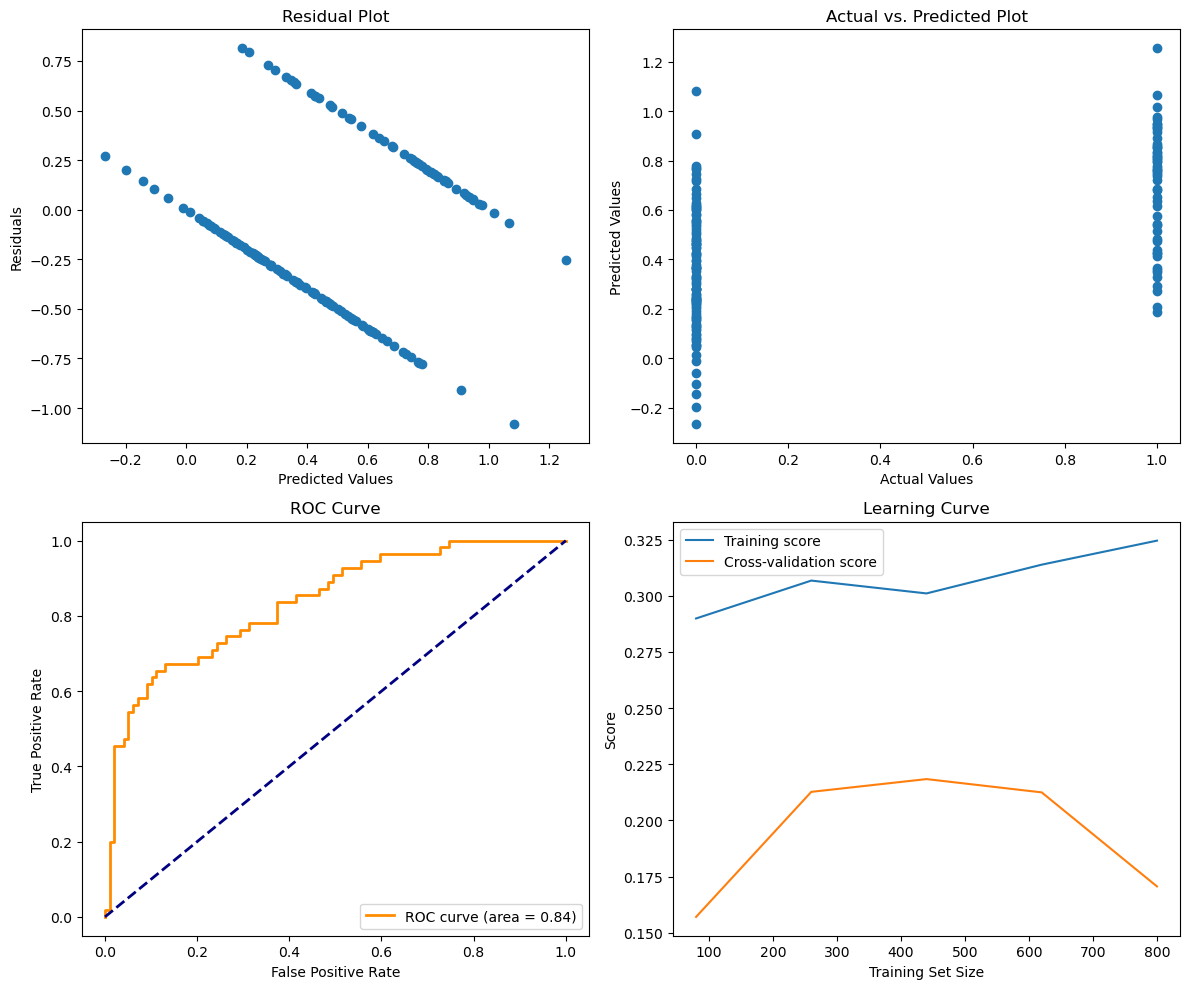

In [61]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Residual Plot
residuals = y_test - y_pred
axs[0, 0].scatter(y_pred, residuals)
axs[0, 0].set_title('Residual Plot')
axs[0, 0].set_xlabel('Predicted Values')
axs[0, 0].set_ylabel('Residuals')

# Actual vs. Predicted Plot
axs[0, 1].scatter(y_test, y_pred)
axs[0, 1].set_title('Actual vs. Predicted Plot')
axs[0, 1].set_xlabel('Actual Values')
axs[0, 1].set_ylabel('Predicted Values')

# ROC Curve (assuming binary classification)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
axs[1, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axs[1, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve')
axs[1, 0].legend(loc='lower right')

# Learning Curve (assuming binary classification)
train_sizes, train_scores, test_scores = learning_curve(model, X_resampled, y_resampled, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
axs[1, 1].plot(train_sizes, train_scores_mean, label='Training score')
axs[1, 1].plot(train_sizes, test_scores_mean, label='Cross-validation score')
axs[1, 1].set_xlabel('Training Set Size')
axs[1, 1].set_ylabel('Score')
axs[1, 1].set_title('Learning Curve')
axs[1, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()

Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        99
           1       0.71      0.80      0.75       101

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

Confusion Matrix:
 [[66 33]
 [20 81]]


C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


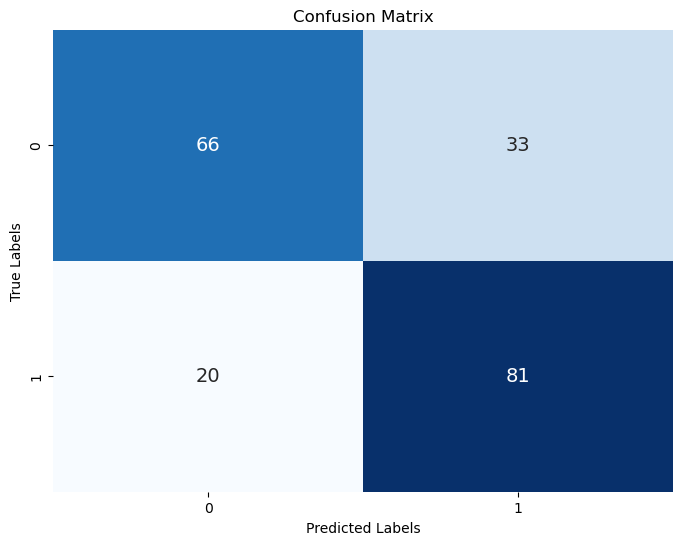

In [62]:
###Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the resampled dataset (replace 'your_resampled_dataset.csv' with the actual file path)
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Separate features (X) and target variable (y) from the resampled data
X_resampled = data_resampled.drop('Outcome', axis=1)
y_resampled = data_resampled['Outcome']

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_reg_model = LogisticRegression(random_state=42)

# Train the model on the resampled training data
logistic_reg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the resampled test set
y_pred_resampled = logistic_reg_model.predict(X_test_resampled)

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
classification_report_result = classification_report(y_test_resampled, y_pred_resampled)
conf_matrix = confusion_matrix(y_test_resampled, y_pred_resampled)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_result)
print('Confusion Matrix:\n', conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71        99
           1       0.71      0.80      0.75       101

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.74      0.73      0.73       200

Confusion Matrix:
 [[66 33]
 [20 81]]


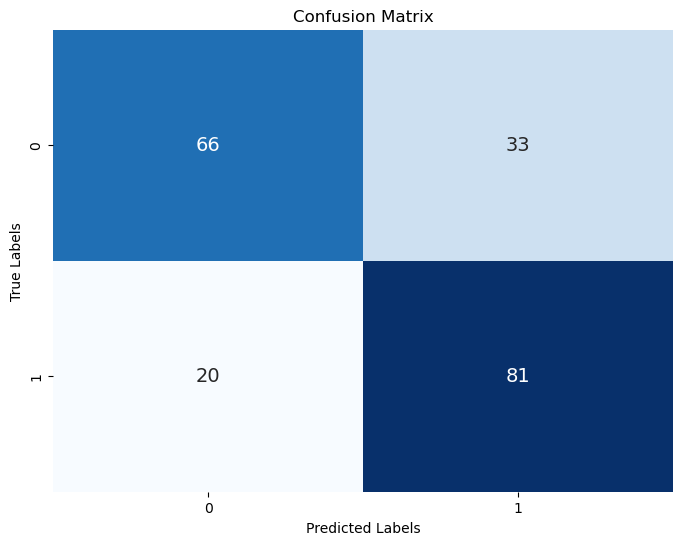

C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

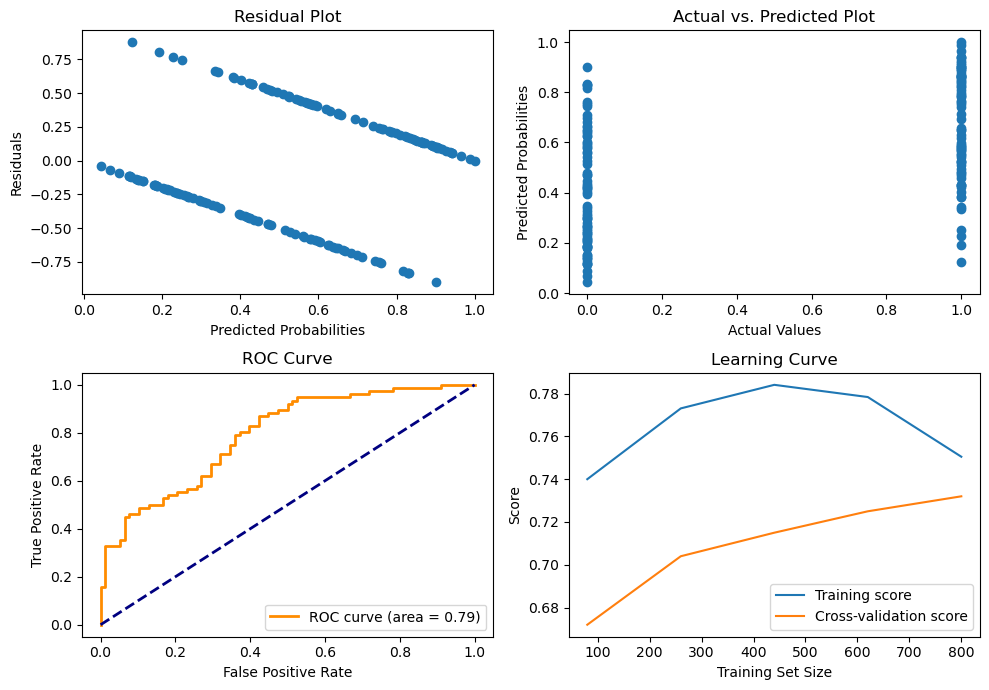

In [63]:
### Logistic Regression

import pandas as pd
import numpy as np  # Add this import for learning_curve
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the resampled dataset (replace 'your_resampled_dataset.csv' with the actual file path)
data_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Separate features (X) and target variable (y) from the resampled data
X_resampled = data_resampled.drop('Outcome', axis=1)
y_resampled = data_resampled['Outcome']

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_reg_model = LogisticRegression(random_state=42)

# Train the model on the resampled training data
logistic_reg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the resampled test set
y_pred_resampled = logistic_reg_model.predict(X_test_resampled)

# Calculate predicted probabilities
y_pred_proba = logistic_reg_model.predict_proba(X_test_resampled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
classification_report_result = classification_report(y_test_resampled, y_pred_resampled)
conf_matrix = confusion_matrix(y_test_resampled, y_pred_resampled)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report_result)
print('Confusion Matrix:\n', conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


y_pred_proba_subset = y_pred_proba[:154]

plt.figure(figsize=(10, 7))  # Adjust the figsize as needed

# Residual Plot
plt.subplot(2, 2, 1)
residuals = y_test_resampled.iloc[:154] - y_pred_proba_subset
plt.scatter(y_pred_proba_subset, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Residuals')

# Actual vs. Predicted Plot
plt.subplot(2, 2, 2)
plt.scatter(y_test_resampled.iloc[:154], y_pred_proba_subset)
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Probabilities')

# ... (rest of your code)


# ROC Curve
plt.subplot(2, 2, 3)
fpr, tpr, _ = roc_curve(y_test_resampled[:154], y_pred_proba_subset)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Learning Curve (Assuming binary classification)
plt.subplot(2, 2, 4)
train_sizes, train_scores, test_scores = learning_curve(logistic_reg_model, X_resampled, y_resampled, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()


In [27]:
#LASSO

In [64]:
#Lasso Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

alpha = 0.01  
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_resampled, y_resampled)

y_pred = lasso_model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{cm}')



Mean Squared Error: 0.17601951879168967
R^2 Score: 0.23333720704064032
Accuracy: 0.7142857142857143
Precision: 0.5774647887323944
Recall: 0.7454545454545455
F1 Score: 0.6507936507936508
Confusion Matrix:
[[69 30]
 [14 41]]


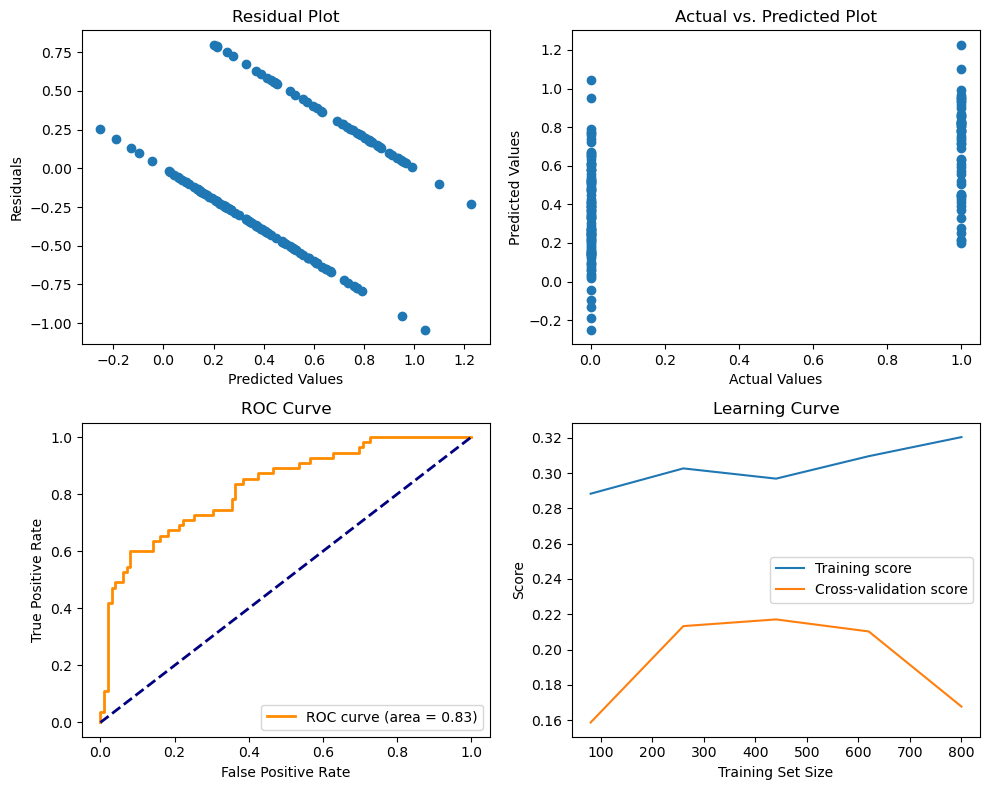

In [65]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Actual vs. Predicted Plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Learning Curve
plt.subplot(2, 2, 4)
train_sizes, train_scores, test_scores = learning_curve(lasso_model, X_resampled, y_resampled, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()

In [66]:
### Ridge Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
alpha = 0.01  
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_resampled, y_resampled)

y_pred = ridge_model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

cm = confusion_matrix(y_test, y_pred_binary)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Confusion Matrix:\n{cm}')


Mean Squared Error: 0.17209482062851428
R^2 Score: 0.25043144792913763
Accuracy: 0.7272727272727273
Precision: 0.5942028985507246
Recall: 0.7454545454545455
F1 Score: 0.661290322580645
Confusion Matrix:
[[71 28]
 [14 41]]


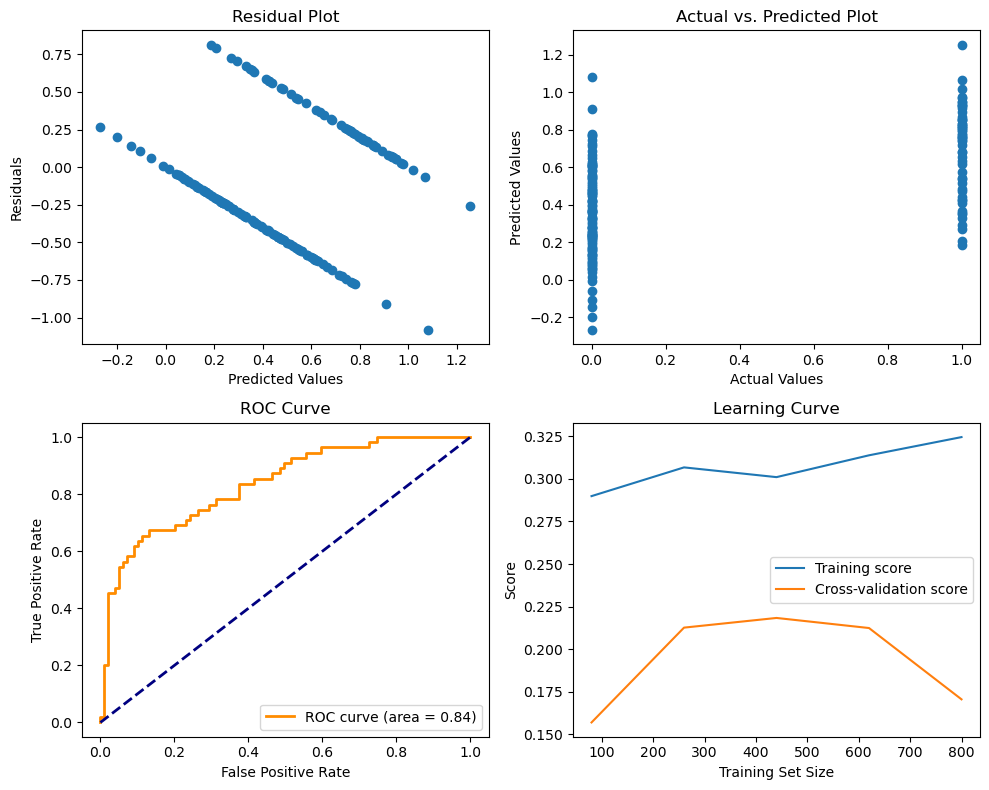

In [67]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Actual vs. Predicted Plot
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.subplot(2, 2, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Learning Curve
plt.subplot(2, 2, 4)
train_sizes, train_scores, test_scores = learning_curve(ridge_model, X_resampled, y_resampled, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()

In [68]:
##Kmeans with KNN


import pandas as pd
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset (replace 'your_dataset.csv' with the actual file path)

# Assuming 'features' are the columns you want to use for clustering and classification
features = data.drop('Outcome', axis=1)  # Assuming 'Outcome' is the target column
target = data['Outcome']

# Step 1: Apply K-Means to create clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(features)

# Add cluster labels to the original dataset
data['Cluster'] = clusters

# Step 2: Apply KNN within each cluster
for cluster_label in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster_label]
    
    X_cluster = cluster_data.drop(['Outcome', 'Cluster'], axis=1)
    y_cluster = cluster_data['Outcome']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
    
    # Initialize KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Adjust the number of neighbors as needed
    
    # Train the KNN model
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)
    
    # Evaluate the KNN model within each cluster
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy for Cluster {cluster_label}: {accuracy:.2f}')
    print(f'Classification Report for Cluster {cluster_label}:\n{classification_report(y_test, y_pred)}')


C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Accuracy for Cluster 0: 0.71
Classification Report for Cluster 0:
              precision    recall  f1-score   support

           0       0.79      0.80      0.79        69
           1       0.52      0.50      0.51        30

    accuracy                           0.71        99
   macro avg       0.65      0.65      0.65        99
weighted avg       0.70      0.71      0.71        99

Accuracy for Cluster 1: 0.72
Classification Report for Cluster 1:
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.58      0.82      0.68        17

    accuracy                           0.72        47
   macro avg       0.73      0.75      0.72        47
weighted avg       0.77      0.72      0.73        47

Accuracy for Cluster 2: 0.50
Classification Report for Cluster 2:
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.50      0.75      

In [69]:
##K means with svm


import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_resampled)

X_resampled['Cluster'] = clusters
for cluster_label in X_resampled['Cluster'].unique():
    cluster_data = X_resampled[X_resampled['Cluster'] == cluster_label]
    X_cluster = cluster_data.drop(['Cluster'], axis=1)
    y_cluster = y_resampled[X_resampled['Cluster'] == cluster_label] 
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    svm_classifier = SVC(kernel='linear', random_state=42) 
    
    svm_classifier.fit(X_train, y_train)
    
    y_svm_pred = svm_classifier.predict(X_test)
    
    svm_accuracy = accuracy_score(y_test, y_svm_pred)
    print(f'SVM Accuracy for Cluster {cluster_label}: {svm_accuracy:.2f}')
    print(f'SVM Classification Report for Cluster {cluster_label}:\n{classification_report(y_test, y_svm_pred)}')

C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


SVM Accuracy for Cluster 1: 0.72
SVM Classification Report for Cluster 1:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76        64
           1       0.81      0.56      0.66        61

    accuracy                           0.72       125
   macro avg       0.74      0.72      0.71       125
weighted avg       0.74      0.72      0.71       125

SVM Accuracy for Cluster 0: 0.73
SVM Classification Report for Cluster 0:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        31
           1       0.69      0.88      0.77        33

    accuracy                           0.73        64
   macro avg       0.75      0.73      0.73        64
weighted avg       0.75      0.73      0.73        64

SVM Accuracy for Cluster 2: 0.67
SVM Classification Report for Cluster 2:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1   

C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


SVM Accuracy for Cluster 1: 0.72
Sensitivity (True Positive Rate) for Cluster 1: 0.56
Specificity (True Negative Rate) for Cluster 1: 0.88
SVM Accuracy for Cluster 0: 0.73
Sensitivity (True Positive Rate) for Cluster 0: 0.88
Specificity (True Negative Rate) for Cluster 0: 0.58
SVM Accuracy for Cluster 2: 0.67
Sensitivity (True Positive Rate) for Cluster 2: 0.70
Specificity (True Negative Rate) for Cluster 2: 0.50


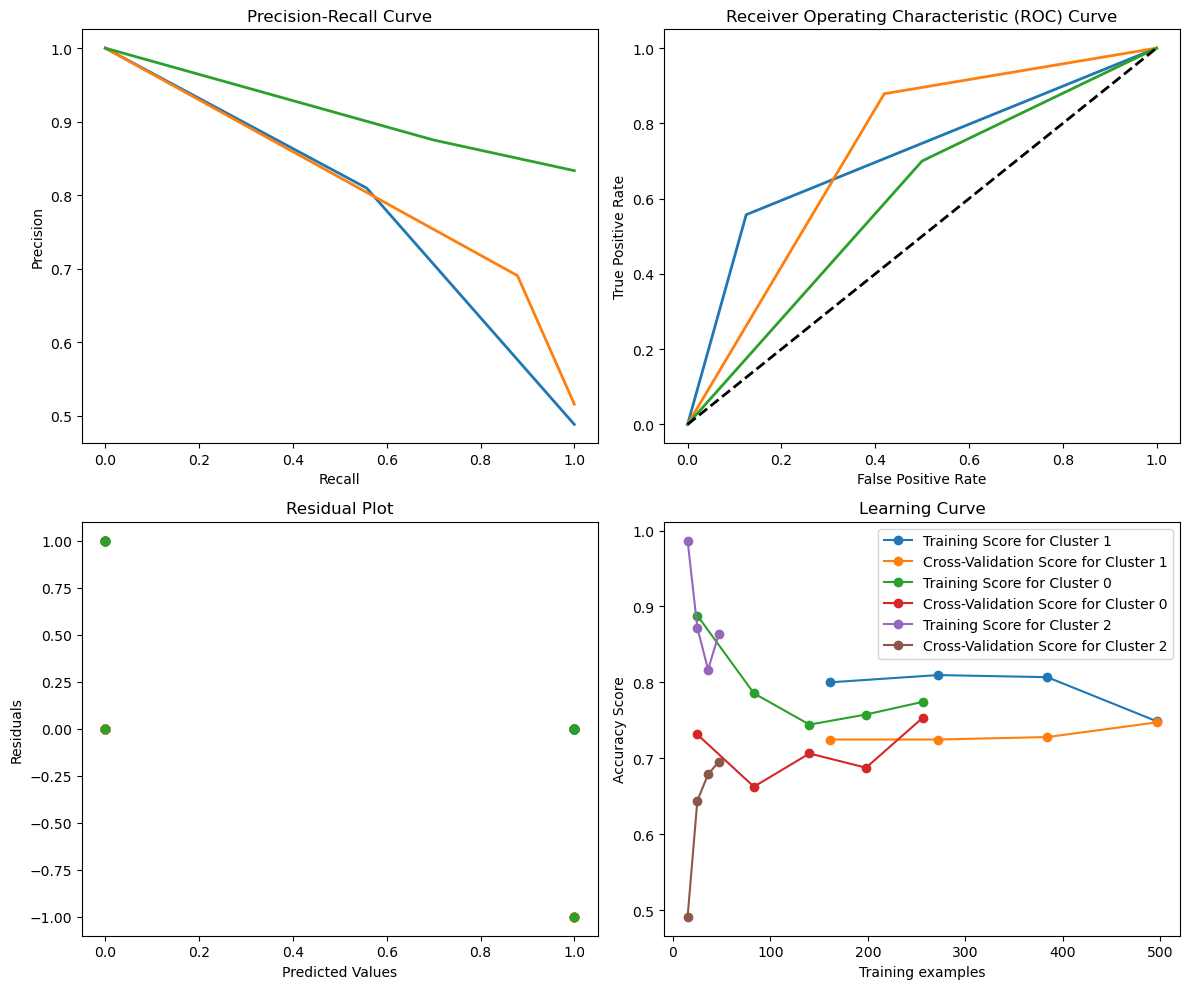

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

# Assuming 'X_resampled' and 'y_resampled' are your resampled features and target

kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(X_resampled)

X_resampled['Cluster'] = clusters

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

for cluster_label in X_resampled['Cluster'].unique():
    cluster_data = X_resampled[X_resampled['Cluster'] == cluster_label]
    X_cluster = cluster_data.drop(['Cluster'], axis=1)
    y_cluster = y_resampled[X_resampled['Cluster'] == cluster_label] 
    X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

    # SVM Classifier
    svm_classifier = SVC(kernel='linear', random_state=42) 
    svm_classifier.fit(X_train, y_train)
    y_svm_pred = svm_classifier.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_svm_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f'SVM Accuracy for Cluster {cluster_label}: {accuracy_score(y_test, y_svm_pred):.2f}')
    print(f'Sensitivity (True Positive Rate) for Cluster {cluster_label}: {sensitivity:.2f}')
    print(f'Specificity (True Negative Rate) for Cluster {cluster_label}: {specificity:.2f}')

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_svm_pred)
    axes[0, 0].plot(recall, precision, lw=2, label=f'PR curve for Cluster {cluster_label}')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_svm_pred)
    roc_auc = auc(fpr, tpr)
    axes[0, 1].plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f}) for Cluster {cluster_label}')

    # Residual Plot
    residuals = y_test - y_svm_pred
    axes[1, 0].scatter(y_svm_pred, residuals, label=f'Residual Plot for Cluster {cluster_label}')

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(svm_classifier, X_cluster, y_cluster, cv=5, scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    axes[1, 1].plot(train_sizes, train_scores_mean, 'o-', label=f'Training Score for Cluster {cluster_label}')
    axes[1, 1].plot(train_sizes, test_scores_mean, 'o-', label=f'Cross-Validation Score for Cluster {cluster_label}')

# Precision-Recall Curve
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve')

# ROC Curve
axes[0, 1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')

# Residual Plot
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residual Plot')

# Learning Curve
axes[1, 1].set_xlabel('Training examples')
axes[1, 1].set_ylabel('Accuracy Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()


In [71]:
#fuzzy c means with knn

import pandas as pd
import numpy as np
from skfuzzy.cluster import cmeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

data_for_clustering = df.drop('Outcome', axis=1).values.T
centers, u, _, _, _, _, _ = cmeans(data_for_clustering, 2, 2, error=0.005, maxiter=1000, seed=42)
df['FuzzyCluster'] = np.argmax(u, axis=0)
X = df.drop(['Outcome', 'FuzzyCluster'], axis=1)
y = df['Outcome']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Accuracy: 0.765
Precision: 0.7410714285714286
Recall (Sensitivity): 0.8217821782178217
F1 Score: 0.7793427230046948
Sensitivity (True Positive Rate): 0.8217821782178217
Specificity (True Negative Rate): 0.7070707070707071


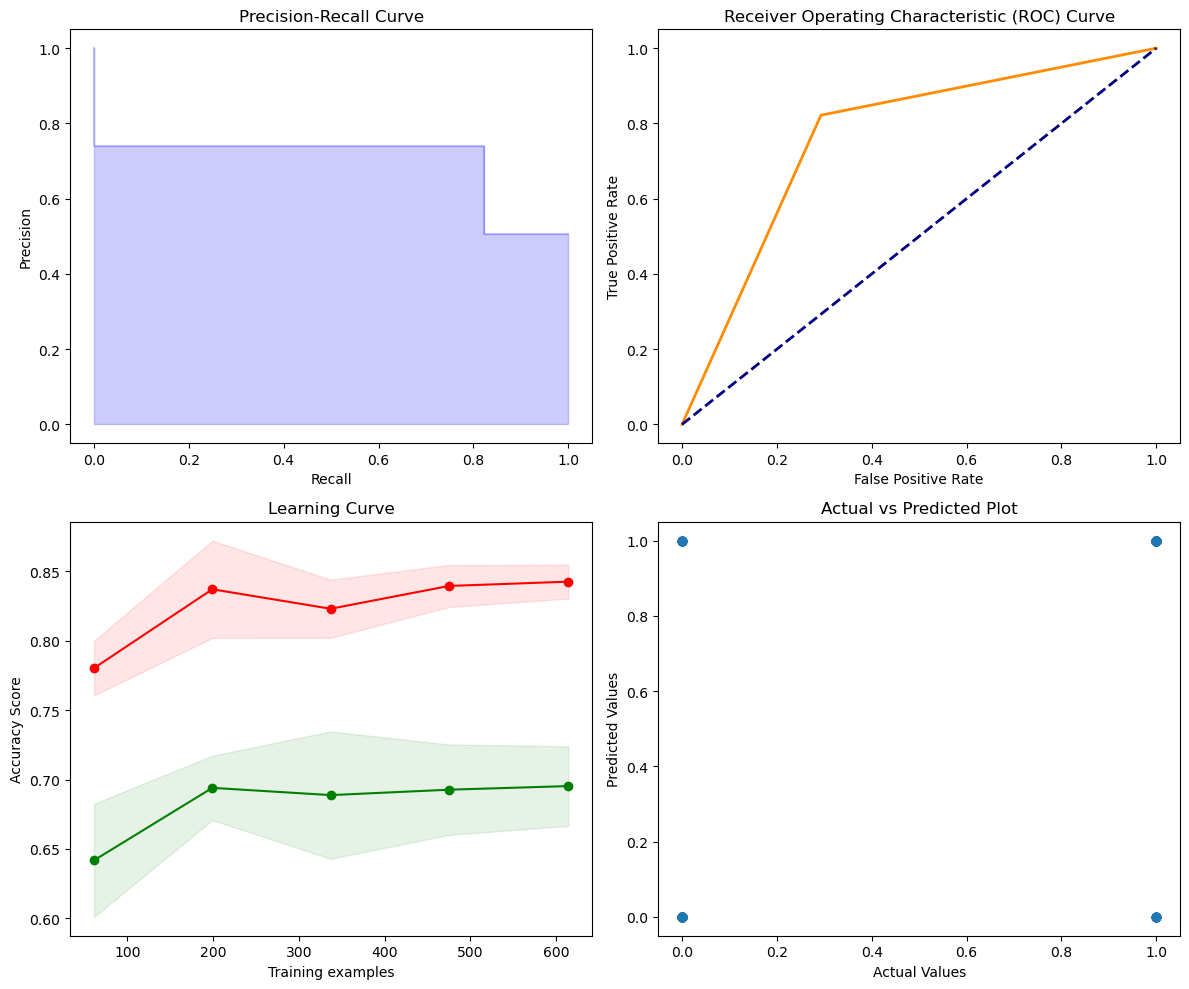

In [72]:


# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
axes[0, 0].step(recall, precision, color='b', alpha=0.2, where='post')
axes[0, 0].fill_between(recall, precision, step='post', alpha=0.2, color='b')
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(knn, X, y, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
axes[1, 0].plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
axes[1, 0].plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
axes[1, 0].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
axes[1, 0].fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
axes[1, 0].set_xlabel('Training examples')
axes[1, 0].set_ylabel('Accuracy Score')
axes[1, 0].set_title('Learning Curve')

# Actual vs Predicted Plot
axes[1, 1].scatter(y_test, y_pred)
axes[1, 1].set_xlabel('Actual Values')
axes[1, 1].set_ylabel('Predicted Values')
axes[1, 1].set_title('Actual vs Predicted Plot')

# Adjust layout
plt.tight_layout()
plt.show()


In [73]:
#SVM


import pandas as pd
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE


kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df.drop('Outcome', axis=1))
X = df.drop(['Outcome', 'Cluster'], axis=1)
y = df['Outcome']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42)
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)

C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darksoul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Accuracy: 0.74
Precision: 0.7289719626168224
Recall (Sensitivity): 0.7722772277227723
F1 Score: 0.7499999999999999
Sensitivity (True Positive Rate): 0.7722772277227723
Specificity (True Negative Rate): 0.7070707070707071


In [74]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


Accuracy: 0.775
Precision: 0.7545454545454545
Recall (Sensitivity): 0.8217821782178217
F1 Score: 0.7867298578199051
Sensitivity (True Positive Rate): 0.8217821782178217
Specificity (True Negative Rate): 0.7272727272727273


Random Forest Accuracy: 0.78
Sensitivity (True Positive Rate): 0.82
Specificity (True Negative Rate): 0.73


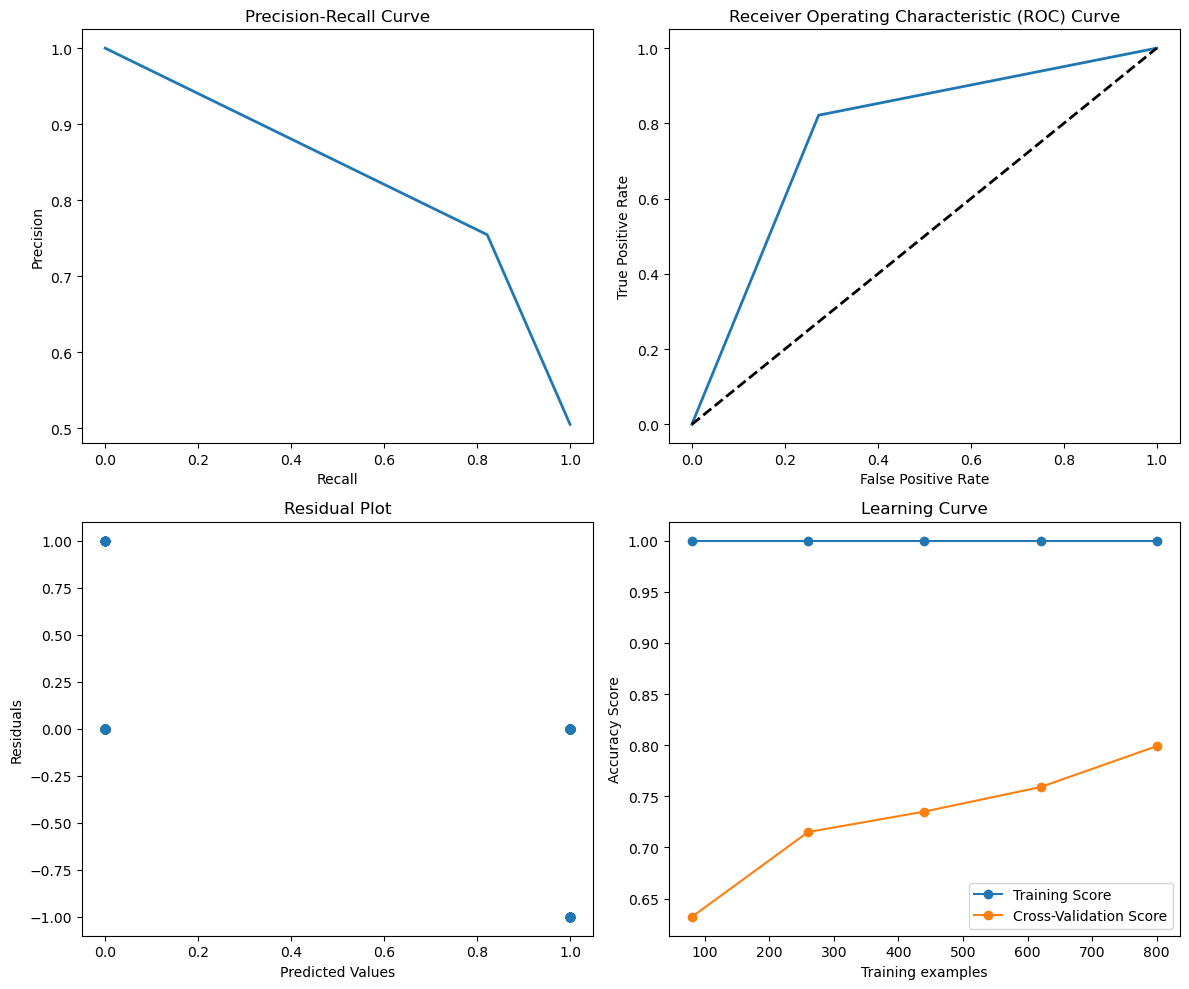

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from itertools import cycle

# Assuming 'X_resampled' and 'y_resampled' are your resampled features and target

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred = rf_classifier.predict(X_test_scaled)

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.2f}')
print(f'Specificity (True Negative Rate): {specificity:.2f}')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
axes[0, 0].plot(recall, precision, lw=2, label='PR curve')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Residual Plot
residuals = y_test - y_pred
axes[1, 0].scatter(y_pred, residuals, label='Residual Plot')

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
axes[1, 1].plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
axes[1, 1].plot(train_sizes, test_scores_mean, 'o-', label='Cross-Validation Score')

# Precision-Recall Curve
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve')

# ROC Curve
axes[0, 1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')

# Residual Plot
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residual Plot')

# Learning Curve
axes[1, 1].set_xlabel('Training examples')
axes[1, 1].set_ylabel('Accuracy Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()


In [48]:
#Naive Bayes

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
y_resampled = y_resampled.values
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)




print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from itertools import cycle

# Assuming 'X_resampled' and 'y_resampled' are your resampled features and target

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_resampled, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)
y_pred = best_rf_classifier.predict(X_test)

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.2f}')
print(f'Specificity (True Negative Rate): {specificity:.2f}')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
axes[0, 0].plot(recall, precision, lw=2, label='PR curve')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Residual Plot
residuals = y_test - y_pred
axes[1, 0].scatter(y_pred, residuals, label='Residual Plot')

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_rf_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
axes[1, 1].plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
axes[1, 1].plot(train_sizes, test_scores_mean, 'o-', label='Cross-Validation Score')

# Precision-Recall Curve
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve')

# ROC Curve
axes[0, 1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')

# Residual Plot
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residual Plot')

# Learning Curve
axes[1, 1].set_xlabel('Training examples')
axes[1, 1].set_ylabel('Accuracy Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Assuming you have X_resampled and y_resampled defined before this code snippet

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, 
                                                    y_resampled, 
                                                    test_size=0.2, 
                                                    random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, auc, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from itertools import cycle

# Assuming 'X_resampled' and 'y_resampled' are your resampled features and target

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_resampled, test_size=0.2, random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)
y_pred = best_dt_classifier.predict(X_test)

# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.2f}')
print(f'Specificity (True Negative Rate): {specificity:.2f}')

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
axes[0, 0].plot(recall, precision, lw=2, label='PR curve')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
axes[0, 1].plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# Residual Plot
residuals = y_test - y_pred
axes[1, 0].scatter(y_pred, residuals, label='Residual Plot')

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_dt_classifier, X_resampled, y_resampled, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
axes[1, 1].plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
axes[1, 1].plot(train_sizes, test_scores_mean, 'o-', label='Cross-Validation Score')

# Precision-Recall Curve
axes[0, 0].set_xlabel('Recall')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_title('Precision-Recall Curve')

# ROC Curve
axes[0, 1].plot([0, 1], [0, 1], 'k--', lw=2)
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')

# Residual Plot
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residual Plot')

# Learning Curve
axes[1, 1].set_xlabel('Training examples')
axes[1, 1].set_ylabel('Accuracy Score')
axes[1, 1].set_title('Learning Curve')
axes[1, 1].legend(loc='best')

# Adjust layout
plt.tight_layout()
plt.show()
